# Análise Exploratória dos Dados Rotulados - AcTBeCalf Dataset

Este notebook realiza uma análise exploratória completa dos dados rotulados do dataset AcTBeCalf, que contém dados de acelerômetro de bezerros com comportamentos anotados.


In [1]:
# Importações
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


## 1. Carregamento dos Dados


In [2]:
# Carregar dados usando Polars (mais eficiente para arquivos grandes)
print("Carregando dados rotulados...")
df_pl = pl.read_parquet('AcTBeCalf.parquet')

# Converter para Pandas para análises e visualizações
df = df_pl.to_pandas()

print(f"✅ Dados carregados com sucesso!")
print(f"📊 Dimensões: {df.shape[0]:,} linhas × {df.shape[1]} colunas")
print(f"💾 Uso de memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Carregando dados rotulados...
✅ Dados carregados com sucesso!
📊 Dimensões: 2,467,162 linhas × 7 colunas
💾 Uso de memória: 70.59 MB


## 2. Visão Geral dos Dados


In [3]:
# Informações gerais
print("=" * 80)
print("INFORMAÇÕES GERAIS DO DATASET")
print("=" * 80)
print(f"\n📋 Colunas e Tipos:")
print(df.dtypes)
print(f"\n📝 Primeiras 10 linhas:")
df.head(10)


INFORMAÇÕES GERAIS DO DATASET

📋 Colunas e Tipos:
dateTime     datetime64[us]
calfId             category
accX                float32
accY                float32
accZ                float32
behaviour          category
segId                 int64
dtype: object

📝 Primeiras 10 linhas:


,dateTime,calfId,accX,accY,accZ,behaviour,segId
0,2022-02-24 00:08:34.402385,1306,0.812500,0.390625,0.281250,oral_manipulation_of_pen,0
1,2022-02-24 00:08:34.441385,1306,0.687500,0.375000,0.375000,oral_manipulation_of_pen,0
2,2022-02-24 00:08:34.481386,1306,0.625000,0.296875,0.265625,oral_manipulation_of_pen,0
3,2022-02-24 00:08:34.521386,1306,0.703125,0.218750,0.218750,oral_manipulation_of_pen,0
4,2022-02-24 00:08:34.560387,1306,0.734375,0.218750,0.250000,oral_manipulation_of_pen,0
5,2022-02-24 00:08:34.600387,1306,0.750000,0.234375,0.250000,oral_manipulation_of_pen,0
6,2022-02-24 00:08:34.639388,1306,0.937500,0.312500,0.171875,oral_manipulation_of_pen,0
7,2022-02-24 00:08:34.679388,1306,0.890625,0.328125,0.250000,oral_manipulation_of_pen,0
8,2022-02-24 00:08:34.718389,1306,0.703125,0.375000,0.156250,oral_manipulation_of_pen,0
9,2022-02-24 00:08:34.757389,1306,0.937500,0.171875,0.000000,oral_manipulation_of_pen,0


In [4]:
# Verificar valores faltantes
print("=" * 80)
print("VALORES FALTANTES")
print("=" * 80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Coluna': missing.index,
    'Valores Faltantes': missing.values,
    'Percentual (%)': missing_pct.values
})
missing_df = missing_df[missing_df['Valores Faltantes'] > 0]
if len(missing_df) > 0:
    print(missing_df)
else:
    print("✅ Nenhum valor faltante encontrado!")


VALORES FALTANTES
✅ Nenhum valor faltante encontrado!


In [7]:
# Estatísticas descritivas das acelerações
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS - ACELERAÇÕES")
print("=" * 80)
df[['accX', 'accY', 'accZ']].describe()

ESTATÍSTICAS DESCRITIVAS - ACELERAÇÕES


,accX,accY,accZ
count,2.467162e+06,2.467162e+06,2.467162e+06
mean,7.037011e-01,-1.383766e-01,2.585113e-02
std,4.324866e-01,3.670153e-01,4.031672e-01
min,-5.656250e+00,-7.765625e+00,-3.625000e+00
25%,6.250000e-01,-4.218750e-01,-1.718750e-01
50%,7.968750e-01,-1.562500e-01,0.000000e+00
75%,9.062500e-01,1.406250e-01,2.968750e-01
max,7.859375e+00,6.593750e+00,6.593750e+00


## 4. Análise de Comportamentos


In [35]:
behaviour_counts = df['behaviour'].value_counts().sort_values(ascending=False)


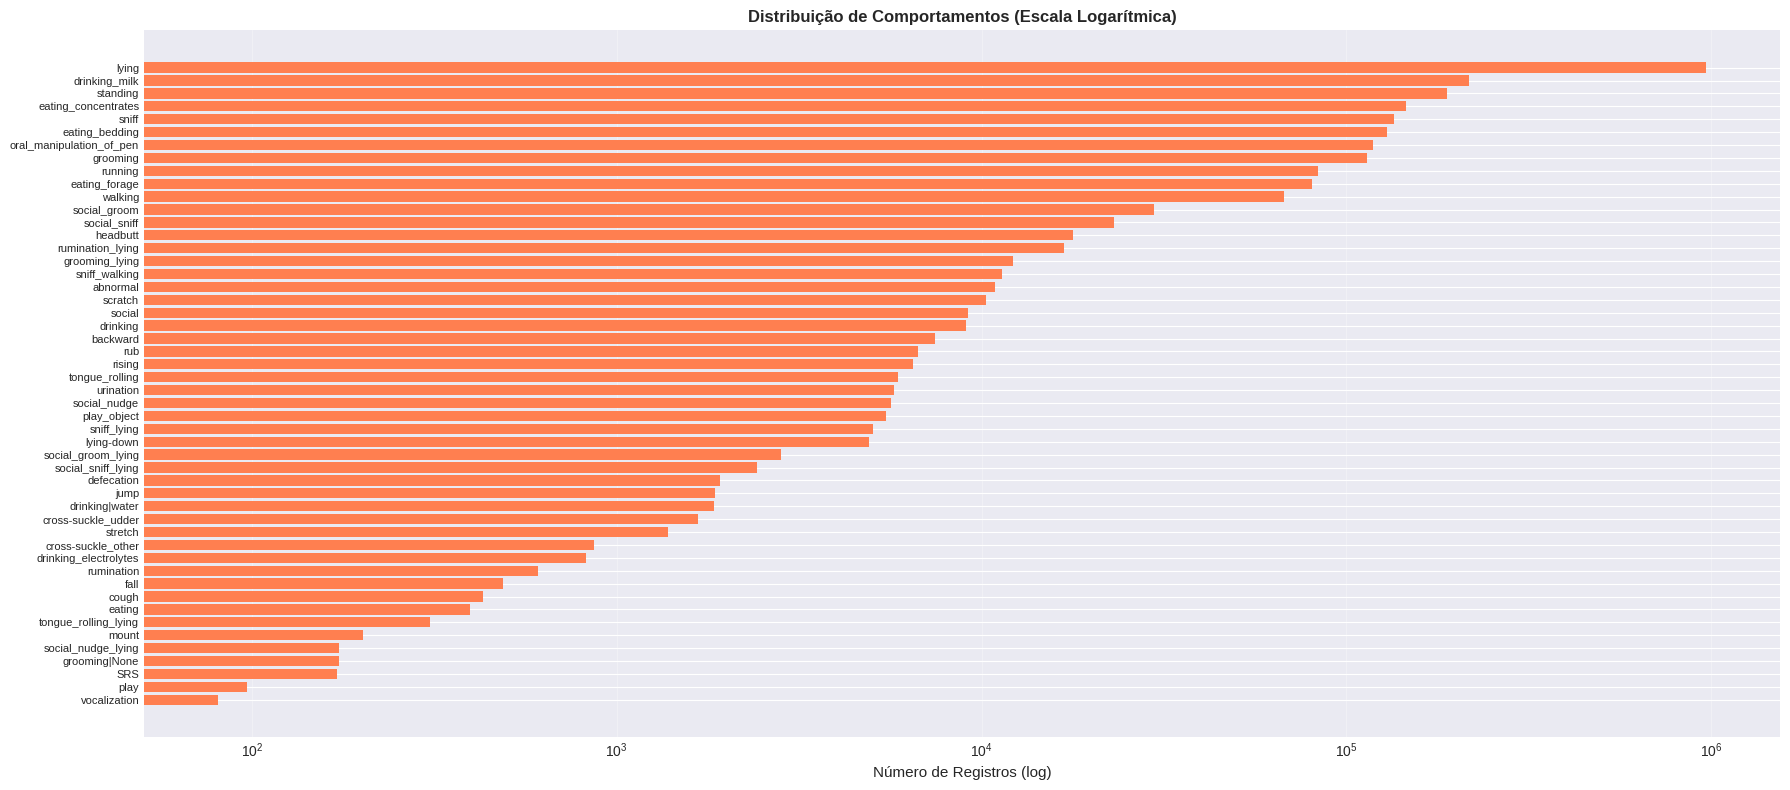

In [34]:
# Visualização: Distribuição de comportamentos
fig, ax = plt.subplots(figsize=(18, 8))

# Ordenar os comportamentos do menos para o mais frequente
behaviour_counts_sorted = behaviour_counts.sort_values(ascending=True)

# Gráfico de barras horizontal com escala logarítmica
ax.barh(range(len(behaviour_counts_sorted)), behaviour_counts_sorted.values, color='coral')
ax.set_yticks(range(len(behaviour_counts_sorted)))
ax.set_yticklabels(behaviour_counts_sorted.index, fontsize=8)
ax.set_xlabel('Número de Registros (log)', fontsize=11)
ax.set_title('Distribuição de Comportamentos (Escala Logarítmica)', fontsize=12, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


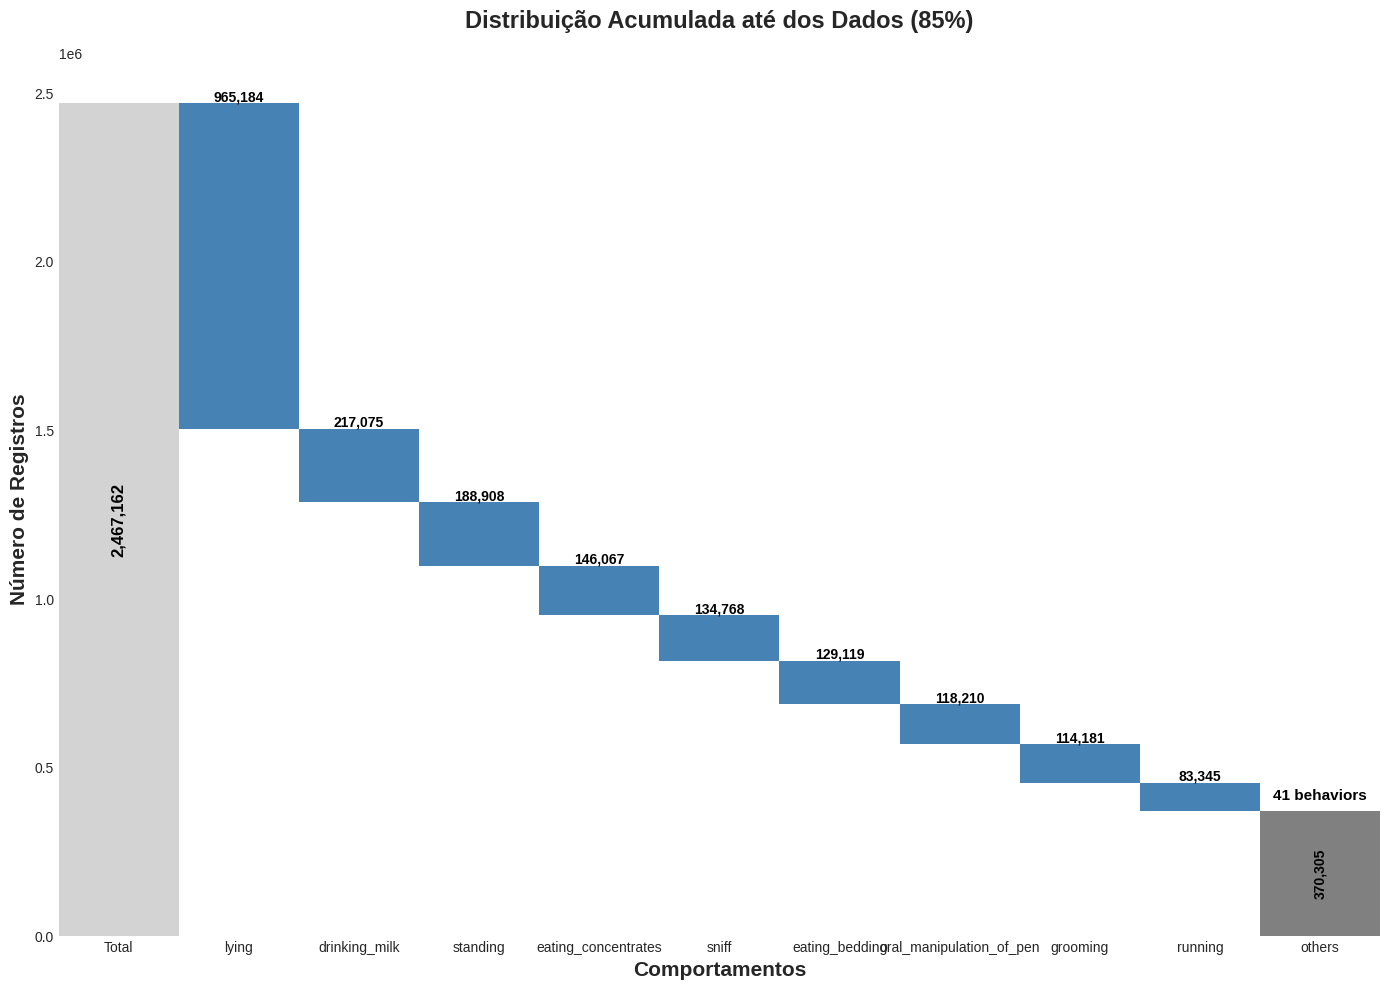

In [59]:
# Análise de desbalanceamento

total = len(df)
behaviour_pct = (behaviour_counts / total * 100).round(2)

behaviour_stats = pd.DataFrame({
    'Comportamento': behaviour_counts.index,
    'Contagem': behaviour_counts.values,
    'Percentual (%)': behaviour_pct.values
})

# Calcular métricas de desbalanceamento
max_count = behaviour_counts.max()
min_count = behaviour_counts.min()
imbalance_ratio = max_count / min_count

# Calcular porcentagem acumulada
behaviour_pct_cumsum = behaviour_pct.cumsum()

# Encontrar quantos comportamentos são necessários para atingir 85%
comportamentos_ate_85 = (behaviour_pct_cumsum <= 85).sum()
if comportamentos_ate_85 == len(behaviour_pct_cumsum):
    # Se não atingir 85% com todos, pegar o primeiro que ultrapassa
    comportamentos_ate_85 = (behaviour_pct_cumsum >= 85).idxmax() + 1

# Selecionar comportamentos principais e "others"
behaviours_ate_85 = behaviour_counts.head(comportamentos_ate_85)
outros_behaviours = behaviour_counts.iloc[comportamentos_ate_85:]
others_count = outros_behaviours.sum()
others_label = "others"

# Calcular quantos comportamentos estão em "others"
num_behaviours_others = len(outros_behaviours)

# Labels e valores para o gráfico
bar_labels = ['Total'] + list(behaviours_ate_85.index) + [others_label]
bar_counts = [total] + list(behaviours_ate_85.values) + [others_count]

fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.set_facecolor('white')  # fundo branco

bar_width = 1.0
x_positions = np.arange(len(bar_labels))

cor_waterfall = 'steelblue'
cor_others = 'gray'
cor_total = 'lightgray'

# 1. Barra do total
ax.bar(0, total, bar_width, color=cor_total, linewidth=2.5, label='Total')
ax.text(0, total/2, f'{total:,}', ha='center', va='center', fontsize=12, fontweight='bold', color='black', rotation=90)

# 2. Barras waterfall principais
y_start = total
for i, (behav, count) in enumerate(zip(behaviours_ate_85.index, behaviours_ate_85.values)):
    y_end = y_start - count
    ax.bar(i+1, count, bar_width, bottom=y_end, color=cor_waterfall, linewidth=2)
    # Inserir aqui o valor absoluto na barra azul, centralizado horizontalmente e perto da barra (no topo dela)
    ax.text(i+1, y_end + count, f"{count:,}", ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    y_start = y_end

# 3. Barra "others" (em vermelho), desce até o eixo
others_bar_x = len(behaviours_ate_85)+1
ax.bar(others_bar_x, y_start, bar_width, bottom=0, color=cor_others, linewidth=2, label='others')
ax.text(others_bar_x, y_start/2, f'{y_start:,}', ha='center', va='center', fontsize=10, fontweight='bold', color='black', rotation=90)

# ✅ Colocar em cima da barra "others" o número de comportamentos agrupados nela
ax.text(
    others_bar_x,                            # posição x
    y_start + total * 0.01,                  # ligeiramente acima da barra
    f"{num_behaviours_others} behaviors",    # texto
    ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
)

ax.set_ylim(0, total * 1.05)
ax.set_xlim(-0.5, len(bar_labels) - 0.5)
ax.set_ylabel('Número de Registros', fontsize=15, fontweight='bold')
ax.set_xlabel('Comportamentos', fontsize=15, fontweight='bold')
ax.set_title(f'Distribuição Acumulada até dos Dados (85%)',
             fontsize=17, fontweight='bold', pad=25)
ax.set_xticks(x_positions)
# Corrigir os rótulos, deixar todos horizontais e centralizados
ax.set_xticklabels(bar_labels, fontsize=10, ha='center', rotation=0)
ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig('waterfall_chart.png', dpi=300, bbox_inches='tight')
plt.show()


## 5. Análise por Bezerro (calfId)


In [33]:
# Tabela: Comportamentos agrupados por faixas de quantidade de registros
print("=" * 80)
print("COMPORTAMENTOS POR FAIXAS DE QUANTIDADE DE REGISTROS")
print("=" * 80)

# Definir faixas
def categorizar_faixa(count):
    if count < 1000:
        return "< 1.000"
    elif count < 10000:
        return "1.000 - 10.000"
    elif count < 50000:
        return "10.000 - 50.000"
    elif count < 100000:
        return "50.000 - 100.000"
    elif count < 200000:
        return "100.000 - 200.000"
    else:
        return "> 200.000"

# Criar DataFrame com faixas
behaviour_faixas = pd.DataFrame({
    'comportamento': behaviour_counts.index,
    'quantidade': behaviour_counts.values
})
behaviour_faixas['faixa'] = behaviour_faixas['quantidade'].apply(categorizar_faixa)

# Ordenar faixas
ordem_faixas = ["< 1.000", "1.000 - 10.000", "10.000 - 50.000",
                "50.000 - 100.000", "100.000 - 200.000", "> 200.000"]
behaviour_faixas['faixa'] = pd.Categorical(behaviour_faixas['faixa'], categories=ordem_faixas, ordered=True)

# Agrupar por faixa: concatenar nomes dos comportamentos e somar quantidades
tabela_agrupada = behaviour_faixas.groupby('faixa').agg({
    'comportamento': lambda x: ', '.join(sorted(x)),
    'quantidade': 'sum'
}).reset_index()

# Calcular percentual
total = len(df)
tabela_agrupada['percentual'] = (tabela_agrupada['quantidade'] / total * 100).round(2)

# Contar número de comportamentos por faixa
num_comportamentos = behaviour_faixas.groupby('faixa')['comportamento'].count().reset_index()
num_comportamentos.columns = ['faixa', 'num_comportamentos']
tabela_agrupada = tabela_agrupada.merge(num_comportamentos, on='faixa')

# Reordenar colunas
tabela_df = tabela_agrupada[['faixa', 'num_comportamentos', 'comportamento', 'quantidade', 'percentual']].copy()
tabela_df.columns = ['Faixa', 'Número de Comportamentos', 'Comportamentos', 'Total de Registros', 'Percentual (%)']

# Ordenar por ordem das faixas
tabela_df['Faixa'] = pd.Categorical(tabela_df['Faixa'], categories=ordem_faixas, ordered=True)
tabela_df = tabela_df.sort_values('Faixa')

# Exibir tabela
print("\n📊 Tabela de Comportamentos por Faixa:")
print(tabela_df.to_string(index=False))

# Salvar em CSV
csv_filename = 'comportamentos_por_faixa.csv'
tabela_df.to_csv(csv_filename, index=False, encoding='utf-8')
print(f"\n✅ Tabela salva em: {csv_filename}")


COMPORTAMENTOS POR FAIXAS DE QUANTIDADE DE REGISTROS

📊 Tabela de Comportamentos por Faixa:
            Faixa  Número de Comportamentos                                                                                                                                                                                                                Comportamentos  Total de Registros  Percentual (%)
          < 1.000                        13                                                           SRS, cough, cross-suckle_other, drinking_electrolytes, eating, fall, grooming|None, mount, play, rumination, social_nudge_lying, tongue_rolling_lying, vocalization                4810            0.19
   1.000 - 10.000                        18 backward, cross-suckle_udder, defecation, drinking, drinking|water, jump, lying-down, play_object, rising, rub, sniff_lying, social, social_groom_lying, social_nudge, social_sniff_lying, stretch, tongue_rolling, urination               85591            3.47
  

## 6. Análise de Segmentos (segId)


## 7. Análise das Acelerações (accX, accY, accZ)


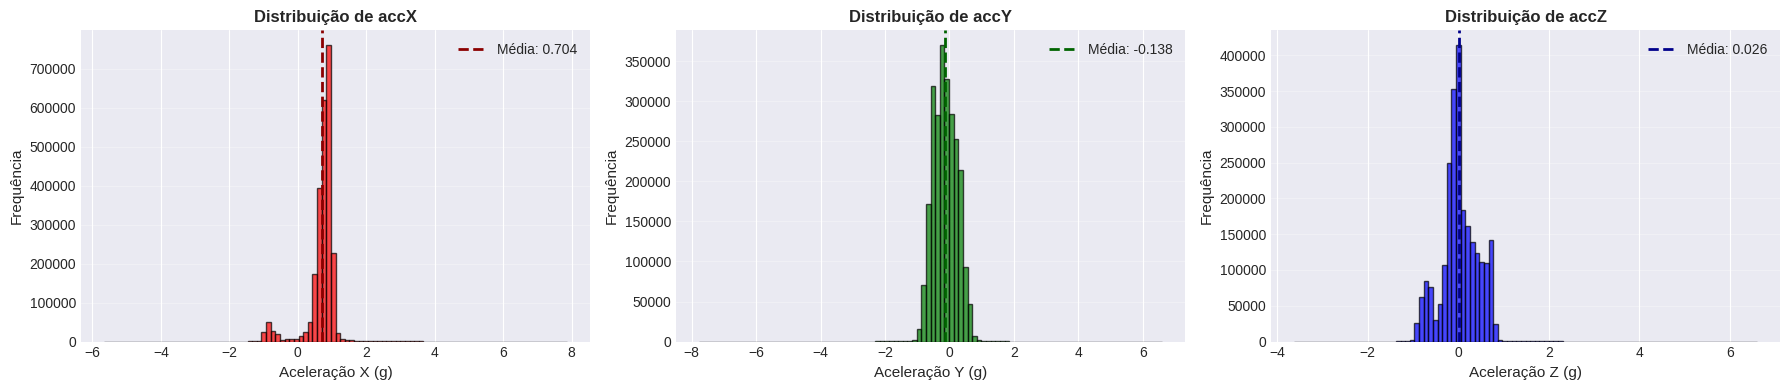

In [39]:
# Visualização: Distribuições das acelerações (sem magnitude)
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Histogramas accX
axes[0].hist(df['accX'].values, bins=100, color='red', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Aceleração X (g)', fontsize=11)
axes[0].set_ylabel('Frequência', fontsize=11)
axes[0].set_title('Distribuição de accX', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].axvline(df['accX'].mean(), color='darkred', linestyle='--', linewidth=2, label=f'Média: {df["accX"].mean():.3f}')
axes[0].legend()

# Histogramas accY
axes[1].hist(df['accY'].values, bins=100, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Aceleração Y (g)', fontsize=11)
axes[1].set_ylabel('Frequência', fontsize=11)
axes[1].set_title('Distribuição de accY', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].axvline(df['accY'].mean(), color='darkgreen', linestyle='--', linewidth=2, label=f'Média: {df["accY"].mean():.3f}')
axes[1].legend()

# Histogramas accZ
axes[2].hist(df['accZ'].values, bins=100, color='blue', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Aceleração Z (g)', fontsize=11)
axes[2].set_ylabel('Frequência', fontsize=11)
axes[2].set_title('Distribuição de accZ', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')
axes[2].axvline(df['accZ'].mean(), color='darkblue', linestyle='--', linewidth=2, label=f'Média: {df["accZ"].mean():.3f}')
axes[2].legend()

plt.tight_layout()
plt.show()
